In [51]:
import pandas as pd
import numpy as np
import os
from utils import image_str_to_np
import matplotlib.pyplot as plt
import random
from sklearn.model_selection import train_test_split

In [2]:
base_data_dir = '.\P96-Section-2-Emotion-AI\Emotion+AI+Dataset\Emotion AI Dataset'
df = pd.read_csv(
    os.path.join(base_data_dir, 'data.csv')
)

In [3]:
df.head()

,left_eye_center_x,left_eye_center_y,right_eye_center_x,right_eye_center_y,left_eye_inner_corner_x,left_eye_inner_corner_y,left_eye_outer_corner_x,left_eye_outer_corner_y,right_eye_inner_corner_x,right_eye_inner_corner_y,...,nose_tip_y,mouth_left_corner_x,mouth_left_corner_y,mouth_right_corner_x,mouth_right_corner_y,mouth_center_top_lip_x,mouth_center_top_lip_y,mouth_center_bottom_lip_x,mouth_center_bottom_lip_y,Image
0,66.033564,39.002274,30.227008,36.421678,59.582075,39.647423,73.130346,39.969997,36.356571,37.389402,...,57.066803,61.195308,79.970165,28.614496,77.388992,43.312602,72.935459,43.130707,84.485774,238 236 237 238 240 240 239 241 241 243 240 23...
1,64.332936,34.970077,29.949277,33.448715,58.856170,35.274349,70.722723,36.187166,36.034723,34.361532,...,55.660936,56.421447,76.352000,35.122383,76.047660,46.684596,70.266553,45.467915,85.480170,219 215 204 196 204 211 212 200 180 168 178 19...
2,65.057053,34.909642,30.903789,34.909642,59.412000,36.320968,70.984421,36.320968,37.678105,36.320968,...,53.538947,60.822947,73.014316,33.726316,72.732000,47.274947,70.191789,47.274947,78.659368,144 142 159 180 188 188 184 180 167 132 84 59 ...
3,65.225739,37.261774,32.023096,37.261774,60.003339,39.127179,72.314713,38.380967,37.618643,38.754115,...,54.166539,65.598887,72.703722,37.245496,74.195478,50.303165,70.091687,51.561183,78.268383,193 192 193 194 194 194 193 192 168 111 50 12 ...
4,66.725301,39.621261,32.244810,38.042032,58.565890,39.621261,72.515926,39.884466,36.982380,39.094852,...,64.889521,60.671411,77.523239,31.191755,76.997301,44.962748,73.707387,44.227141,86.871166,147 148 160 196 215 214 216 217 219 220 206 18...


In [4]:
df['Image'] = df['Image'].apply(image_str_to_np)

In [5]:
columns = df.columns[:-1]

In [6]:
columns

Index(['left_eye_center_x', 'left_eye_center_y', 'right_eye_center_x',
       'right_eye_center_y', 'left_eye_inner_corner_x',
       'left_eye_inner_corner_y', 'left_eye_outer_corner_x',
       'left_eye_outer_corner_y', 'right_eye_inner_corner_x',
       'right_eye_inner_corner_y', 'right_eye_outer_corner_x',
       'right_eye_outer_corner_y', 'left_eyebrow_inner_end_x',
       'left_eyebrow_inner_end_y', 'left_eyebrow_outer_end_x',
       'left_eyebrow_outer_end_y', 'right_eyebrow_inner_end_x',
       'right_eyebrow_inner_end_y', 'right_eyebrow_outer_end_x',
       'right_eyebrow_outer_end_y', 'nose_tip_x', 'nose_tip_y',
       'mouth_left_corner_x', 'mouth_left_corner_y', 'mouth_right_corner_x',
       'mouth_right_corner_y', 'mouth_center_top_lip_x',
       'mouth_center_top_lip_y', 'mouth_center_bottom_lip_x',
       'mouth_center_bottom_lip_y'],
      dtype='object')

In [7]:
import copy

df_copy = copy.copy(df)

# horizontal Flip - flip the images along y axis
df_copy['Image'] = df_copy['Image'].apply(lambda x : np.flip(x, axis=1))

# since we are flipping horizontally, y coordinate values would be the same
# Only x coordiante values would change, all we have to do is to subtract our initial x-coordinate values from width of the image(96)
for i in range(len(columns)):
    if i%2 == 0:
        df_copy[columns[i]] = df_copy[columns[i]].apply(lambda x: 96. - float(x) )

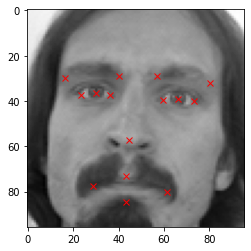

In [8]:
plt.imshow(df['Image'][0], cmap='gray')
for j in range(1, 31, 2):
    plt.plot(df.loc[0][j-1], df.loc[0][j], 'rx')

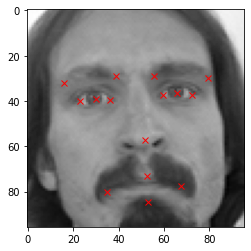

In [9]:
plt.imshow(df_copy['Image'][0], cmap='gray')
for j in range(1, 31, 2):
    plt.plot(df_copy.loc[0][j-1], df_copy.loc[0][j], 'rx')

In [10]:
# concatenate the original image with augmented dataframe
augmented_df = np.concatenate([df, df_copy])

In [11]:
augmented_df.shape

(4280, 31)

In [12]:
# Increase the brightness of the image
df_copy = copy.copy(df)
df_copy['Image'] = df_copy['Image'].apply(lambda x : np.clip(random.uniform(1.5, 2)*x, 0, 255.0))
augmented_df = np.concatenate([augmented_df, df_copy])
augmented_df.shape

(6420, 31)

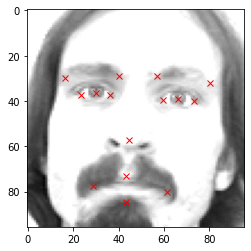

In [13]:
plt.imshow(df_copy['Image'][0], cmap='gray')
for j in range(1, 31, 2):
    plt.plot(df_copy.loc[0][j-1], df_copy.loc[0][j], 'rx')

In [14]:
np.flip(df['Image'][0], 0)

array([[191, 184, 184, ...,  70,  75,  90],
       [189, 188, 207, ...,  61,  69,  78],
       [186, 183, 181, ...,  52,  57,  60],
       ...,
       [237, 236, 237, ..., 251, 251, 250],
       [235, 238, 236, ..., 249, 250, 251],
       [238, 236, 237, ..., 250, 250, 250]])

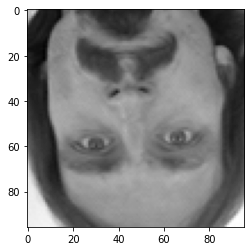

In [15]:
plt.imshow(np.flip(df['Image'][0], 0), cmap='gray')

In [16]:
df_copy = copy.copy(df)

# vertical Flip - flip the images along x axis
df_copy['Image'] = df_copy['Image'].apply(lambda image : np.flip(image, axis=0))

# since we are flipping horizontally, x coordinate values would be the same
# Only y coordiante values would change, all we have to do is to subtract our initial y-coordinate values from width of the image(96)
for i in range(len(columns)):
    if i%2 == 1:
        df_copy[columns[i]] = df_copy[columns[i]].apply(lambda x: 96. - float(x) )

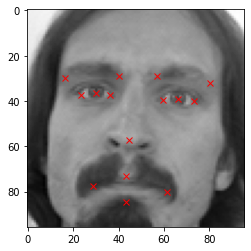

In [17]:
plt.imshow(df['Image'][0], cmap='gray')
for j in range(1, 31, 2):
    plt.plot(df.loc[0][j-1], df.loc[0][j], 'rx')

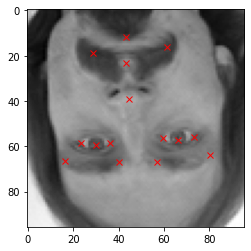

In [18]:
plt.imshow(df_copy['Image'][0], cmap='gray')
for j in range(1, 31, 2):
    plt.plot(df_copy.loc[0][j-1], df_copy.loc[0][j], 'rx')

In [45]:
# get all image column data
images = augmented_df[:, -1]

# Normalize the images
images = images/255.

# create an empty array of shape (x, 96, 96, 1) to feed the model
X = np.empty((len(images), 96, 96, 1))

# iterate ghrough the img list an add image values to the empty array after expanding it's dimension
for i in range(len(images)):
    X[i,] = np.expand_dims(images[i], axis=2)
    
X = np.asarray(X).astype(np.float32)

In [47]:
y = augmented_df[:, :-1]
y = np.asarray(y).astype(np.float32)
y.shape

(6420, 30)

In [52]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1)